In [219]:
# Imports 
# Task: Describe packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sys
import os

#import ipdb

import importlib

In [220]:
# Setting working directory
working_directory = '/Users/ruzejjur/Github/TMoCOBoT_python'
os.chdir(working_directory)

In [221]:
# Adding scripts
# Add the directory containing the script to sys.path
script_path = os.path.abspath(os.path.join(working_directory, 'Code', 'auxiliary'))
sys.path.append(script_path)

# Importing auxiliary functions script
import auxiliary
# Reload the module to ensure changes are reflected
importlib.reload(auxiliary) 

<module 'auxiliary' from '/Users/ruzejjur/Github/TMoCOBoT_python/Code/auxiliary/auxiliary.py'>

In [222]:
# # Temporary block of placeholder functions

# # Placeholder for The_primary_modelers_aposterior_old and The_primary_modelers_aposterior_updated
# # Define the function Simulated_example according to your specific algorithm
# def simulated_example(scores, opinion_certainty, apply_certainty, responders, trust_matrix, preference, brand_preference, range_size, low_weight, *experts):
#     # Placeholder for demonstration, replace with your actual logic
#     aposterior_old = np.random.rand(3)
#     aposterior_updated = np.random.rand(3)
#     return aposterior_old, aposterior_updated

# Simulated examples

To simplify the analysis, specific parameters are defined for the experts, which include the following:
10 experts for each brand. 

 - 3 mobile brands. 
 - 3 features.
 - 6 score values.

These parameters have been deliberately chosen to configure the system and demonstrate the functionality of our proposed solution.

The parameters associated with the primary modeler are as follows:
    - The preference score = 4 for all features.
    - The primary modeler's brand preference follows a uniform distribution.
    - The primary modeler's opinion on brands is established in the experimental setup.
    - The primary modeler's certainty is established in the experimental setup.
    - The primary modeler's trust is established in the experimental setup.

The preference score is set for simplicity, eliminating one hyper-parameter to tune. 
The primary modeler's brand preference is configured to ensure that the choice of the brand  is not influenced by the primary modeler's bias.

The objective is to design experiments in such a way that the brand selection process can be inferred from the setup of the experts.

In the following five examples, the primary modeler's opinions are presented in the following table:

In [223]:
# The primary modeler's opinion
the_primary_modelers_scores = [
    [5, 4, 5],
    [6, 5, 6],
    [4, 4, 3]
]

# Creating a DataFrame with the given data
the_primary_modelers_scores_df = pd.DataFrame(
    the_primary_modelers_scores,
    index=["Samsung", "Iphone", "Xiaomi"],
    columns=["Feature 1", "Feature 2", "Feature 3"]
)

print(the_primary_modelers_scores_df)

         Feature 1  Feature 2  Feature 3
Samsung          5          4          5
Iphone           6          5          6
Xiaomi           4          4          3


The primary modeler's opinion on brands is as follows: iPhone > Samsung > Xiaomi.

## Opinion Merging and Preference Subsetting

The aim of this section is to illustrate the influence of expert opinions on the primary modeler's brand preference.

### Example 1
The experts are configured to prefer the brands in the following order: Samsung > iPhone  > Xiaomi.
The Samsung is sligthly more prefered than iPhone, this is setup for later demonstration of the trust valuet  in 'Inclusion of trust' section.

In [224]:
# The primary modelers opinion
the_primary_modelers_scores = np.array([
    [5, 4, 5],
    [6, 5, 6],
    [4, 4, 3]
])

# Setting up the opinion certainty
opinion_certainty = np.array([1, 1, 1])

apply_certainty = False

# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded
n_of_responders = np.array([10, 10, 10])

# The trust is applied to the agents opinion uniformly to all scores
# Trust_matrix = np.array([
#     [0.8, 0.7, 0.7, 0.8, 0.9],
#     [0.8, 0.7, 0.9, 0.8, 0.8],
#     [0.9, 0.7, 0.8, 0.8, 0.9]
# ])

# Setting trust like this is equivalent to no inclusion of trust
Trust_matrix = np.ones((3, 10))

# Primary modelers score preference for each feature
score_preference = np.array([4, 4, 4])

# Primary modelers brand preference
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)

score_range_size = 6

# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to low value
low_weight_for_unselected_features = 0.01

# Converting the primary modelers scores to a DataFrame for better readability
the_primary_modelers_scores_df = pd.DataFrame(
    the_primary_modelers_scores,
    index=["Samsung", "Iphone", "Xiaomi"],
    columns=["Feature 1", "Feature 2", "Feature 3"]
)

print("The Primary Modeler's Scores:")
print(the_primary_modelers_scores_df)


The Primary Modeler's Scores:
         Feature 1  Feature 2  Feature 3
Samsung          5          4          5
Iphone           6          5          6
Xiaomi           4          4          3


The opinion's of individual experts  for each brand .

### Expert opinions

In [225]:
# Simulated experts for SAMSUNG
samsung_experts = np.array([
    [4, 3, 4], [5, 3, 5], [5, 6, 5], [6, 5, 3], [6, 6, 6], 
    [5, 6, 5], [6, 6, 5], [6, 3, 4], [4, 5, 4], [6, 4, 3]
])

# Simulated experts for IPHONE
iphone_experts = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
])

# Simulated experts for XIAOMI
xiaomi_experts = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
])

# Creating DataFrames for each brand
samsung_experts_df = pd.DataFrame(
    samsung_experts, 
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"],
    index=(f"Samsung expert {i+1}" for i in range(10))
)

iphone_experts_df = pd.DataFrame(
    iphone_experts, 
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"],
    index=(f"Iphone expert {i+1}" for i in range(10))
)

xiaomi_experts_df = pd.DataFrame(
    xiaomi_experts, 
    columns=["Feature 1 score", "Feature 2 score", "Feature 3 score"],
    index=(f"Xiaomi expert {i+1}" for i in range(10))
)

# Displaying the DataFrames
print("Samsung Experts' Opinions:")
print(samsung_experts_df)
print("\nIphone Experts' Opinions:")
print(iphone_experts_df)
print("\nXiaomi Experts' Opinions:")
print(xiaomi_experts_df)


Samsung Experts' Opinions:
                   Feature 1 score  Feature 2 score  Feature 3 score
Samsung expert 1                 4                3                4
Samsung expert 2                 5                3                5
Samsung expert 3                 5                6                5
Samsung expert 4                 6                5                3
Samsung expert 5                 6                6                6
Samsung expert 6                 5                6                5
Samsung expert 7                 6                6                5
Samsung expert 8                 6                3                4
Samsung expert 9                 4                5                4
Samsung expert 10                6                4                3

Iphone Experts' Opinions:
                  Feature 1 score  Feature 2 score  Feature 3 score
Iphone expert 1                 5                5                5
Iphone expert 2                 5                6 

Comparison of the primary modeler's posterior distribution on brands before and after opinion merging.

In [226]:
The_primary_modelers_aposterior_old, The_primary_modelers_aposterior_updated = auxiliary.simulated_example(
    the_primary_modelers_scores, opinion_certainty, apply_certainty, n_of_responders, Trust_matrix, score_preference, P_I_B, score_range_size, low_weight_for_unselected_features, *samsung_experts, *iphone_experts, *xiaomi_experts
)

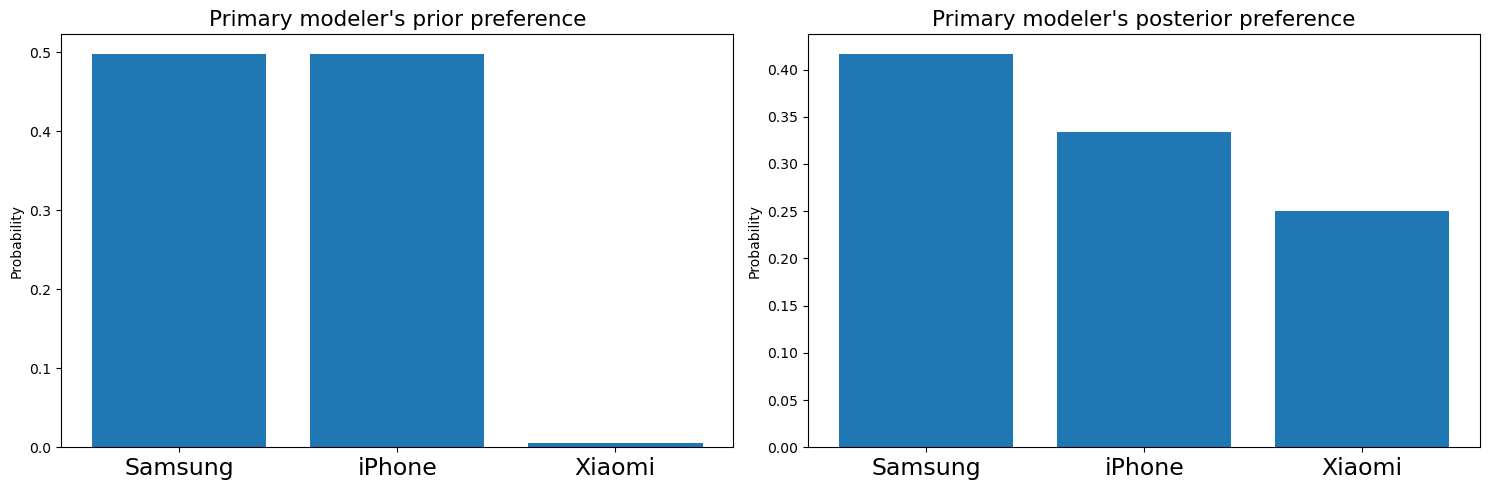

In [227]:
### Place holder data to be removed ----------------------------------------
# Placeholder data for the a posteriori distributions
# # Replace these with the actual output from the simulated_example function
# # The_primary_modelers_aposterior_old = np.random.rand(3)
# # The_primary_modelers_aposterior_updated = np.random.rand(3)

# --------------------------------------------------------------------------------
# Create a figure window
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Variable names for the x-ticks
variable_names = ['Samsung', 'iPhone', 'Xiaomi']

# Plotting the old a posteriori distribution
axes[0].bar(variable_names, The_primary_modelers_aposterior_old)
axes[0].set_ylabel('Probability')
axes[0].set_title("Primary modeler's prior preference", fontsize=15.5)
axes[0].tick_params(axis='x', labelsize=17)

# Plotting the updated a posteriori distribution
axes[1].bar(variable_names, The_primary_modelers_aposterior_updated)
axes[1].set_ylabel('Probability')
axes[1].set_title("Primary modeler's posterior preference", fontsize=15.5)
axes[1].tick_params(axis='x', labelsize=17)

# Save the figure
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_0.png')
plt.tight_layout()
plt.savefig(save_path)

# Show the plots
plt.show()




The primary modeler's posterior distribution on brands before opinion merging.

In [228]:
# Placeholder data for the a posteriori distributions
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_old = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_old_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_old]

# Create a DataFrame
The_primary_modelers_aposterior_old_df = pd.DataFrame(
    [The_primary_modelers_aposterior_old_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print(The_primary_modelers_aposterior_old_df)


  Samsung  iPhone Xiaomi
0  49.75%  49.75%  0.49%


The primary modeler's posterior distribution on brands after opinion merging.

In [229]:
# Placeholder data for the updated a posteriori distributions
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_updated = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_updated_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_updated]

# Create a DataFrame
The_primary_modelers_aposterior_updated_df = pd.DataFrame(
    [The_primary_modelers_aposterior_updated_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Updated:")
print(The_primary_modelers_aposterior_updated_df)

The Primary Modeler's Aposterior Updated:
  Samsung  iPhone  Xiaomi
0  41.65%  33.33%  25.02%


The results suggest that the experts influenced the primary modeler's  opinion to favor the Samsung brand. Additionally, the primary modeler's probability of choosing the Xiaomi brand prior to opinion merging is low due to the low score assigned to feature 3 for the Xiaomi brand.  Consequently, this leads to a low probability entering the posterior distribution before opinion merging, significantly reducing the probability of selecting the Xiaomi brand.

### Example 2

In [230]:
# The primary modelers opinion
the_primary_modelers_scores = np.array([
    [5, 4, 5],
    [6, 5, 6],
    [4, 4, 3]
])

# Setting up the opinion certainty
opinion_certainty = np.array([1, 1, 1])

apply_certainty = False

# Setting up the number of responders for each brand
n_of_responders = np.array([10, 10, 10])

# The trust is applied to the agents' opinion uniformly to all scores
# Trust_matrix = np.array([
#     [0.8, 0.7, 0.7, 0.8, 0.9],
#     [0.8, 0.7, 0.9, 0.8, 0.8],
#     [0.9, 0.7, 0.8, 0.8, 0.9]
# ])

# Setting trust like this is equivalent to no inclusion of trust
Trust_matrix = np.ones((3, 10))

# Primary modelers score preference for each feature
score_preference = np.array([4, 4, 4])

# Primary modelers brand preference
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)

score_range_size = 6

# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value
low_weight_for_unselected_features = 0.01

# Displaying the data for verification
print("Primary Modelers Scores:\n", the_primary_modelers_scores)
print("Opinion Certainty:\n", opinion_certainty)
print("Apply Certainty:\n", apply_certainty)
print("Number of Responders:\n", n_of_responders)
print("Trust Matrix:\n", Trust_matrix)
print("Score Preference:\n", score_preference)
print("Brand Preference (Normalized):\n", P_I_B)
print("Score Range Size:\n", score_range_size)
print("Low Weight for Unselected Features:\n", low_weight_for_unselected_features)


Primary Modelers Scores:
 [[5 4 5]
 [6 5 6]
 [4 4 3]]
Opinion Certainty:
 [1 1 1]
Apply Certainty:
 False
Number of Responders:
 [10 10 10]
Trust Matrix:
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Score Preference:
 [4 4 4]
Brand Preference (Normalized):
 [0.33333333 0.33333333 0.33333333]
Score Range Size:
 6
Low Weight for Unselected Features:
 0.01


The experts are configured to prefer the brands in the following order: Samsung  Iphone  Xiaomi, 
the scores are setup to similar high values.

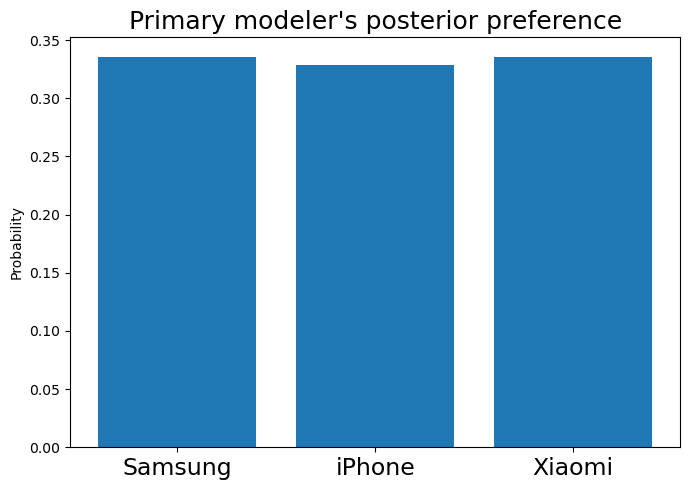

In [231]:
# Simulated experts for SAMSUNG
samsung_experts = np.array([
    [6, 5, 6], [5, 5, 5], [6, 5, 5], [5, 5, 6], [6, 6, 6],
    [5, 6, 5], [6, 5, 5], [6, 5, 5], [5, 6, 6], [6, 5, 5]
])

# Simulated experts for IPHONE
iphone_experts = np.array([
    [5, 6, 5], [6, 5, 5], [6, 5, 6], [5, 6, 5], [6, 6, 5],
    [6, 5, 6], [6, 6, 6], [6, 5, 6], [5, 6, 5], [6, 6, 6]
])

# Simulated weights for Xiaomi
xiaomi_experts = np.array([
    [5, 5, 6], [6, 5, 6], [6, 6, 6], [6, 6, 6], [6, 5, 6],
    [6, 5, 5], [6, 5, 6], [5, 5, 6], [6, 6, 5], [5, 6, 5]
])

# Calling the function with the provided data
The_primary_modelers_aposterior_old, The_primary_modelers_aposterior_updated = auxiliary.simulated_example(
    the_primary_modelers_scores, opinion_certainty, apply_certainty, n_of_responders, Trust_matrix,
    score_preference, P_I_B, score_range_size, low_weight_for_unselected_features,
    *samsung_experts, *iphone_experts, *xiaomi_experts
)

# Create a figure window
plt.figure(figsize=(7, 5))

# The primary modelers' updated aposteriori distribution on brands:
plt.bar(['Samsung', 'iPhone', 'Xiaomi'], The_primary_modelers_aposterior_updated)

# Set the names of the variables
plt.xticks(fontsize=17)

# Show the plot
plt.ylabel('Probability')
plt.title("Primary modeler's posterior preference", fontsize=18)

# Save the plot
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_1.png')
plt.tight_layout()
plt.savefig(save_path)

# Display the plot
plt.show()


The primary modeler's posterior distribution on brands before opinion merging.

In [232]:
# Placeholder for The_primary_modelers_aposterior_old
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_old = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_old_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_old]

# Create a DataFrame
The_primary_modelers_aposterior_old_df = pd.DataFrame(
    [The_primary_modelers_aposterior_old_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Old:")
print(The_primary_modelers_aposterior_old_df)


The Primary Modeler's Aposterior Old:
  Samsung  iPhone Xiaomi
0  49.75%  49.75%  0.49%


The primary modeler's posterior distribution on brands after opinion merging.

In [233]:
# Placeholder for The_primary_modelers_aposterior_updated
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_updated = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_updated_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_updated]

# Create a DataFrame
The_primary_modelers_aposterior_updated_df = pd.DataFrame(
    [The_primary_modelers_aposterior_updated_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Updated:")
print(The_primary_modelers_aposterior_updated_df)


The Primary Modeler's Aposterior Updated:
  Samsung  iPhone  Xiaomi
0  33.56%  32.88%  33.56%


Comment on this result are at the end of this section.

### Example 3

In [234]:
# The primary modelers opinion
the_primary_modelers_scores = np.array([
    [5, 4, 5],
    [6, 5, 6],
    [4, 4, 3]
])

# Setting up the opinion certainty
opinion_certainty = np.array([1, 1, 1])

apply_certainty = False

# Setting up the number of responders for each brand
n_of_responders = np.array([10, 10, 10])

# The trust is applied to the agents' opinion uniformly to all scores
# Trust_matrix = np.array([
#     [0.8, 0.7, 0.7, 0.8, 0.9],
#     [0.8, 0.7, 0.9, 0.8, 0.8],
#     [0.9, 0.7, 0.8, 0.8, 0.9]
# ])

# Setting trust like this is equivalent to no inclusion of trust
Trust_matrix = np.ones((3, 10))

# Primary modelers score preference for each feature
score_preference = np.array([4, 4, 4])

# Primary modelers brand preference
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)

score_range_size = 6

# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value
low_weight_for_unselected_features = 0.01

# Displaying the data for verification
print("Primary Modelers Scores:\n", the_primary_modelers_scores)
print("Opinion Certainty:\n", opinion_certainty)
print("Apply Certainty:\n", apply_certainty)
print("Number of Responders:\n", n_of_responders)
print("Trust Matrix:\n", Trust_matrix)
print("Score Preference:\n", score_preference)
print("Brand Preference (Normalized):\n", P_I_B)
print("Score Range Size:\n", score_range_size)
print("Low Weight for Unselected Features:\n", low_weight_for_unselected_features)


Primary Modelers Scores:
 [[5 4 5]
 [6 5 6]
 [4 4 3]]
Opinion Certainty:
 [1 1 1]
Apply Certainty:
 False
Number of Responders:
 [10 10 10]
Trust Matrix:
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Score Preference:
 [4 4 4]
Brand Preference (Normalized):
 [0.33333333 0.33333333 0.33333333]
Score Range Size:
 6
Low Weight for Unselected Features:
 0.01


The experts are configured to prefer the brands in the following order:
                      Samsung  Iphone  Xiaomi, 
the scores are setup to similar low values.

In [ ]:
# Simulated experts for SAMSUNG
samsung_experts = np.array([
    [3, 4, 4], [3, 4, 4], [4, 4, 4], [4, 3, 3], [4, 3, 3],
    [4, 4, 1], [4, 1, 4], [4, 3, 4], [4, 5, 4], [4, 4, 3]
])

# Simulated experts for IPHONE
iphone_experts = np.array([
    [4, 4, 4], [4, 3, 4], [4, 4, 4], [4, 4, 2], [4, 3, 4],
    [3, 4, 1], [4, 4, 4], [2, 4, 4], [1, 4, 4], [3, 2, 1]
])

# Simulated experts for XIAOMI
xiaomi_experts = np.array([
    [4, 4, 4], [4, 4, 4], [3, 5, 4], [4, 4, 4], [2, 1, 4],
    [4, 4, 5], [3, 4, 2], [4, 3, 4], [4, 4, 1], [1, 2, 3]
])

# Placeholder data for primary modelers scores and other parameters
the_primary_modelers_scores = np.array([
    [5, 4, 5],
    [6, 5, 6],
    [4, 4, 3]
])

opinion_certainty = np.array([1, 1, 1])
apply_certainty = False
n_of_responders = np.array([10, 10, 10])
Trust_matrix = np.ones((3, 10))
score_preference = np.array([4, 4, 4])
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)
score_range_size = 6
low_weight_for_unselected_features = 0.01

# Calling the function with the provided data
The_primary_modelers_aposterior_old, The_primary_modelers_aposterior_updated = auxiliary.simulated_example(
    the_primary_modelers_scores, opinion_certainty, apply_certainty, n_of_responders, Trust_matrix,
    score_preference, P_I_B, score_range_size, low_weight_for_unselected_features,
    *samsung_experts, *iphone_experts, *xiaomi_experts
)

# Create a figure window
plt.figure(figsize=(7, 5))

# The primary modelers' updated aposteriori distribution on brands:
plt.bar(['Samsung', 'iPhone', 'Xiaomi'], The_primary_modelers_aposterior_updated)

# Set the names of the variables
plt.xticks(fontsize=17)

# Show the plot
plt.ylabel('Probability')
plt.title("Primary modeler's posterior preference", fontsize=18)

# Save the plot
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_2.png')
plt.tight_layout()
plt.savefig(save_path)

# Display the plot
plt.show()


The primary modeler's posterior distribution on brands before opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_old
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_old = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_old_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_old]

# Create a DataFrame
The_primary_modelers_aposterior_old_df = pd.DataFrame(
    [The_primary_modelers_aposterior_old_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Old:")
print(The_primary_modelers_aposterior_old_df)


The Primary Modeler's Aposterior Old:
  Samsung  iPhone Xiaomi
0  84.89%  57.24%   4.0%


The primary modeler's posterior distribution on brands after opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_updated
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_updated = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_updated_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_updated]

# Create a DataFrame
The_primary_modelers_aposterior_updated_df = pd.DataFrame(
    [The_primary_modelers_aposterior_updated_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Updated:")
print(The_primary_modelers_aposterior_updated_df)


The Primary Modeler's Aposterior Updated:
  Samsung  iPhone  Xiaomi
0  98.06%  53.41%  18.56%


The results of the last two experiments show only a minor difference in the final brand preference. However, it was expected that the primary modeler's opinion would have a stronger influence, pushing the preference towards the following order: iPhone > Samsung > Xiaomi.

This is attributed to the fact that each expert's contribution to the updated weight  has a magnitude of +1, and the primary modeler's contribution is also + 1. The cumulative effect of the experts' contributions diminishes the impact of the primary modeler's opinion.

To address this, the magnitude of the primary modeler's weights  needs to be adjusted to ensure that the primary modeler's opinion is not diminished. Further elaboration on this adjustment will be provided in the section titled 'Inclusion of Opinion Certainty' below.

## Inclusion of trust
In this section, we are examining the integration of trust , into each expert's  opinion.  The previously mentioned issue still exists and will be addressed later.
For now, the primary modeler's opinion will be de-emphasized. This approach allows for a more precise demonstration of trust inclusion, free from any bias introduced by the primary modeler's opinion.
For simplicity, the setup of the following two experiments is the same as in the first example from the previous section.

### Example 1
We start by configuring low trust values  for experts reacting to the Samsung brand and high trust values for experts reacting to iPhone and Xiaomi. The expected outcome is that the preferred brand should be iPhone, since it has similar score values provided by the experts'  as Samsung, with iPhone being slightly less favored.

In [ ]:
# The primary modelers opinion
the_primary_modelers_scores = np.array([
    [5, 4, 5],
    [6, 5, 6],
    [4, 4, 3]
])

# Setting up the opinion certainty
opinion_certainty = np.array([1, 1, 1])

apply_certainty = False

# Setting up the number of responders for each brand
n_of_responders = np.array([10, 10, 10])

# The trust is applied to the agents' opinion uniformly to all scores
Trust_matrix = np.array([
    [0.8, 0.9, 0.3, 0.7, 0.2, 0.2, 0.3, 0.5, 0.4, 0.9],
    [0.9, 0.9, 0.3, 0.3, 0.7, 0.7, 0.9, 0.9, 0.4, 0.4],
    [0.9, 0.7, 0.8, 0.8, 0.9, 0.8, 0.7, 0.7, 0.8, 0.9]
])

# Setting trust like this is equivalent to no inclusion of trust
# Trust_matrix = np.ones((3, 10))

# Primary modelers score preference for each feature
score_preference = np.array([4, 4, 4])

# Primary modelers brand preference
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)

score_range_size = 6

# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value
low_weight_for_unselected_features = 0.01

# Displaying the data for verification
print("Primary Modelers Scores:\n", the_primary_modelers_scores)
print("Opinion Certainty:\n", opinion_certainty)
print("Apply Certainty:\n", apply_certainty)
print("Number of Responders:\n", n_of_responders)
print("Trust Matrix:\n", Trust_matrix)
print("Score Preference:\n", score_preference)
print("Brand Preference (Normalized):\n", P_I_B)
print("Score Range Size:\n", score_range_size)
print("Low Weight for Unselected Features:\n", low_weight_for_unselected_features)


Primary Modelers Scores:
 [[5 4 5]
 [6 5 6]
 [4 4 3]]
Opinion Certainty:
 [1 1 1]
Apply Certainty:
 False
Number of Responders:
 [10 10 10]
Trust Matrix:
 [[0.8 0.9 0.3 0.7 0.2 0.2 0.3 0.5 0.4 0.9]
 [0.9 0.9 0.3 0.3 0.7 0.7 0.9 0.9 0.4 0.4]
 [0.9 0.7 0.8 0.8 0.9 0.8 0.7 0.7 0.8 0.9]]
Score Preference:
 [4 4 4]
Brand Preference (Normalized):
 [0.33333333 0.33333333 0.33333333]
Score Range Size:
 6
Low Weight for Unselected Features:
 0.01


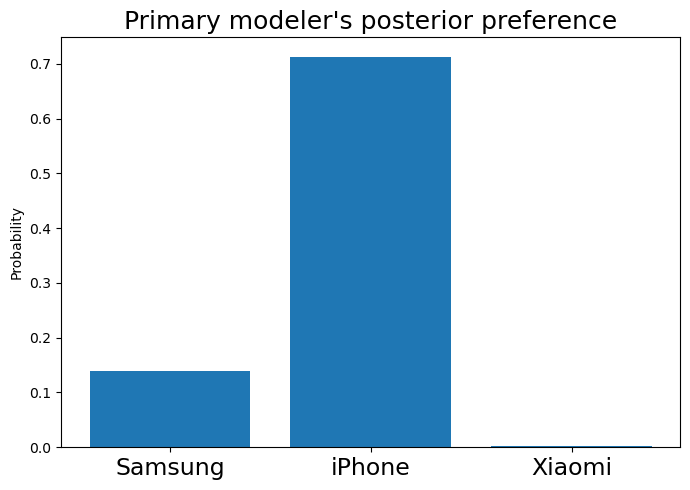

In [ ]:
# Simulated experts for SAMSUNG
samsung_experts = np.array([
    [4, 3, 4], [5, 3, 5], [5, 6, 5], [6, 5, 3], [6, 6, 6], 
    [5, 6, 5], [6, 6, 5], [6, 3, 4], [4, 5, 4], [6, 4, 3]
])

# Simulated experts for IPHONE
iphone_experts = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
])

# Simulated experts for XIAOMI
xiaomi_experts = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
])

# Placeholder data for primary modelers scores and other parameters
the_primary_modelers_scores = np.array([
    [5, 4, 5],
    [6, 5, 6],
    [4, 4, 3]
])

opinion_certainty = np.array([1, 1, 1])
apply_certainty = False
n_of_responders = np.array([10, 10, 10])
Trust_matrix = np.array([
    [0.8, 0.9, 0.3, 0.7, 0.2, 0.2, 0.3, 0.5, 0.4, 0.9],
    [0.9, 0.9, 0.3, 0.3, 0.7, 0.7, 0.9, 0.9, 0.4, 0.4],
    [0.9, 0.7, 0.8, 0.8, 0.9, 0.8, 0.7, 0.7, 0.8, 0.9]
])
score_preference = np.array([4, 4, 4])
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)
score_range_size = 6
low_weight_for_unselected_features = 0.01

# Calling the function with the provided data
The_primary_modelers_aposterior_old, The_primary_modelers_aposterior_updated = auxiliary.simulated_example(
    the_primary_modelers_scores, opinion_certainty, apply_certainty, n_of_responders, Trust_matrix,
    score_preference, P_I_B, score_range_size, low_weight_for_unselected_features,
    *samsung_experts, *iphone_experts, *xiaomi_experts
)

# Create a figure window
plt.figure(figsize=(7, 5))

# The primary modelers' updated aposteriori distribution on brands:
plt.bar(['Samsung', 'iPhone', 'Xiaomi'], The_primary_modelers_aposterior_updated)

# Set the names of the variables
plt.xticks(fontsize=17)

# Show the plot
plt.ylabel('Probability')
plt.title("Primary modeler's posterior preference", fontsize=18)

# Save the plot
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_3.png')
plt.tight_layout()
plt.savefig(save_path)

# Display the plot
plt.show()


The primary modeler's posterior distribution on brands before opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_old
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_old = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_old_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_old]

# Create a DataFrame
The_primary_modelers_aposterior_old_df = pd.DataFrame(
    [The_primary_modelers_aposterior_old_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Old:")
print(The_primary_modelers_aposterior_old_df)


The Primary Modeler's Aposterior Old:
  Samsung  iPhone  Xiaomi
0   7.97%  85.88%  42.05%


The primary modeler's posterior distribution on brands after opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_updated
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_updated = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_updated_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_updated]

# Create a DataFrame
The_primary_modelers_aposterior_updated_df = pd.DataFrame(
    [The_primary_modelers_aposterior_updated_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Updated:")
print(The_primary_modelers_aposterior_updated_df)


The Primary Modeler's Aposterior Updated:
  Samsung  iPhone  Xiaomi
0  80.77%  99.92%  23.67%


### Example 2
Setting the trust  for experts reacting to Samsung and iPhone brands to low values and to high values for Xiaomi. The preferred brand should be Xiaomi.

In [ ]:
# The primary modelers opinion
the_primary_modelers_scores = np.array([
    [5, 4, 5],
    [6, 5, 6],
    [4, 4, 3]
])

# Setting up the opinion certainty
opinion_certainty = np.array([1, 1, 1])

apply_certainty = False

# Setting up the number of responders for each brand
n_of_responders = np.array([10, 10, 10])

# The trust is applied to the agents' opinion uniformly to all scores
Trust_matrix = np.array([
    [0.8, 0.9, 0.5, 0.9, 0.2, 0.2, 0.2, 0.5, 0.4, 0.9],
    [0.3, 0.3, 0.9, 0.9, 0.5, 0.5, 0.2, 0.2, 0.8, 0.8],
    [0.5, 0.7, 0.9, 0.2, 0.9, 0.8, 0.9, 0.7, 0.8, 0.9]
])

# Setting trust like this is equivalent to no inclusion of trust
# Trust_matrix = np.ones((3, 10))

# Primary modelers score preference for each feature
score_preference = np.array([4, 4, 4])

# Primary modelers brand preference
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)

score_range_size = 6

# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value
low_weight_for_unselected_features = 0.01

# Displaying the data for verification
print("Primary Modelers Scores:\n", the_primary_modelers_scores)
print("Opinion Certainty:\n", opinion_certainty)
print("Apply Certainty:\n", apply_certainty)
print("Number of Responders:\n", n_of_responders)
print("Trust Matrix:\n", Trust_matrix)
print("Score Preference:\n", score_preference)
print("Brand Preference (Normalized):\n", P_I_B)
print("Score Range Size:\n", score_range_size)
print("Low Weight for Unselected Features:\n", low_weight_for_unselected_features)


Primary Modelers Scores:
 [[5 4 5]
 [6 5 6]
 [4 4 3]]
Opinion Certainty:
 [1 1 1]
Apply Certainty:
 False
Number of Responders:
 [10 10 10]
Trust Matrix:
 [[0.8 0.9 0.5 0.9 0.2 0.2 0.2 0.5 0.4 0.9]
 [0.3 0.3 0.9 0.9 0.5 0.5 0.2 0.2 0.8 0.8]
 [0.5 0.7 0.9 0.2 0.9 0.8 0.9 0.7 0.8 0.9]]
Score Preference:
 [4 4 4]
Brand Preference (Normalized):
 [0.33333333 0.33333333 0.33333333]
Score Range Size:
 6
Low Weight for Unselected Features:
 0.01


The Primary Modeler's Aposterior Updated:
  Samsung  iPhone  Xiaomi
0  87.45%  18.02%  31.21%


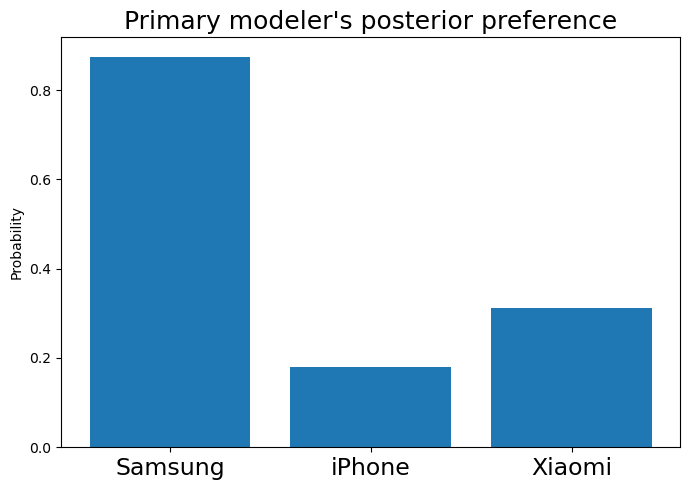

In [ ]:
# Simulated experts for SAMSUNG
samsung_experts = np.array([
    [4, 3, 4], [5, 3, 5], [5, 6, 5], [6, 5, 3], [6, 6, 6], 
    [5, 6, 5], [6, 6, 5], [6, 3, 4], [4, 5, 4], [6, 4, 3]
])

# Simulated experts for IPHONE
iphone_experts = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
])

# Simulated experts for XIAOMI
xiaomi_experts = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
])

# Placeholder data for primary modelers scores and other parameters
the_primary_modelers_scores = np.array([
    [5, 4, 5],
    [6, 5, 6],
    [4, 4, 3]
])

opinion_certainty = np.array([1, 1, 1])
apply_certainty = False
n_of_responders = np.array([10, 10, 10])
Trust_matrix = np.array([
    [0.8, 0.9, 0.5, 0.9, 0.2, 0.2, 0.2, 0.5, 0.4, 0.9],
    [0.3, 0.3, 0.9, 0.9, 0.5, 0.5, 0.2, 0.2, 0.8, 0.8],
    [0.5, 0.7, 0.9, 0.2, 0.9, 0.8, 0.9, 0.7, 0.8, 0.9]
])
score_preference = np.array([4, 4, 4])
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)
score_range_size = 6
low_weight_for_unselected_features = 0.01

# Calling the function with the provided data
The_primary_modelers_aposterior_old, The_primary_modelers_aposterior_updated = auxiliary.simulated_example(
    the_primary_modelers_scores, opinion_certainty, apply_certainty, n_of_responders, Trust_matrix,
    score_preference, P_I_B, score_range_size, low_weight_for_unselected_features,
    *samsung_experts, *iphone_experts, *xiaomi_experts
)

# Round the updated a posteriori values and convert them to percentage strings
The_primary_modelers_aposterior_updated_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_updated]

# Create a DataFrame
The_primary_modelers_aposterior_updated_df = pd.DataFrame(
    [The_primary_modelers_aposterior_updated_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Updated:")
print(The_primary_modelers_aposterior_updated_df)

# Create a figure window
plt.figure(figsize=(7, 5))

# The primary modelers' updated aposteriori distribution on brands:
plt.bar(['Samsung', 'iPhone', 'Xiaomi'], The_primary_modelers_aposterior_updated)

# Set the names of the variables
plt.xticks(fontsize=17)

# Show the plot
plt.ylabel('Probability')
plt.title("Primary modeler's posterior preference", fontsize=18)

# Save the plot
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_4.png')
plt.tight_layout()
plt.savefig(save_path)

# Display the plot
plt.show()


The primary modeler's posterior distribution on brands before opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_old
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_old = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_old_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_old]

# Create a DataFrame
The_primary_modelers_aposterior_old_df = pd.DataFrame(
    [The_primary_modelers_aposterior_old_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Old:")
print(The_primary_modelers_aposterior_old_df)


The Primary Modeler's Aposterior Old:
  Samsung iPhone  Xiaomi
0  83.75%  87.4%  72.36%


The primary modeler's posterior distribution on brands after opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_updated
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_updated = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_updated_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_updated]

# Create a DataFrame
The_primary_modelers_aposterior_updated_df = pd.DataFrame(
    [The_primary_modelers_aposterior_updated_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Updated:")
print(The_primary_modelers_aposterior_updated_df)


The Primary Modeler's Aposterior Updated:
  Samsung  iPhone  Xiaomi
0  26.77%  55.92%  42.95%


The trust process works as intended.

### Inclusion of certainty
This section aims to provide a solution to the problem of setting the primary modeler's initial weights  so that the primary modelers opinion is not diminished, this is described in the first three examples. 
To better demonstrate the proposed solution, the trust values  are intentionaly excluded. When the trust value is not set, it is equivalent to setting the trust   to the maximum value of 1.
In contrast, in the opposite scenario, the weight increments of the experts are generally , this effect is linearly combined with the value of opinion certainty .
A simplified solution was deemed to be sufficient.

For simplicity, the setup of the following three examples are the same as in the first example from the first section, apart from the setup of the primary modeler's opinion and opinion certainty.

### Example 1:
This example illustrates the impact of the opinion certainty  on the final brand ordering. Setting maximum opinion certainty =1  in the primary modeler's low scores for the Samsung brand should lead to the preference for the iPhone as the top brand, Xiaomi being the second most preferred brand.

The primary modeler's opinion is configured to prefer the brands in the following order:
                     Iphone > Xiaomi > Samsung.

In [ ]:
# The primary modelers opinion
The_primary_modelers_scores = np.array([
    [3, 4, 1],
    [6, 5, 6],
    [4, 4, 3]
])

# Create a DataFrame
The_primary_modelers_scores_df = pd.DataFrame(
    The_primary_modelers_scores,
    index=["Samsung", "iPhone", "Xiaomi"],
    columns=["Feature 1", "Feature 2", "Feature 3"]
)

# Display the DataFrame
print("The Primary Modelers Scores Table:")
print(The_primary_modelers_scores_df)


The Primary Modelers Scores Table:
         Feature 1  Feature 2  Feature 3
Samsung          3          4          1
iPhone           6          5          6
Xiaomi           4          4          3


The primary modeler's certainty in the opinion  for each brand is the following: 

In [ ]:
# Setting up the opinion certainty
opinion_certainty = np.array([1, 0.4, 0.1])

# Round the values and convert them to percentage strings
opinion_certainty_percent = [f"{round(value * 100, 1)}%" for value in opinion_certainty]

# Create a DataFrame
opinion_certainty_df = pd.DataFrame(
    [opinion_certainty_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("Opinion Certainty Table:")
print(opinion_certainty_df)


Opinion Certainty Table:
  Samsung iPhone Xiaomi
0  100.0%  40.0%  10.0%


In [ ]:
# Apply certainty
apply_certainty = True

# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded
n_of_responders = np.array([10, 10, 10])

# The trust is applied to the agents' opinion uniformly to all scores
# Trust_matrix = np.array([
#     [0.8, 0.9, 0.3, 0.7, 0.2, 0.2, 0.3, 0.5, 0.4, 0.9],
#     [0.9, 0.9, 0.3, 0.3, 0.7, 0.7, 0.9, 0.9, 0.4, 0.4],
#     [0.9, 0.7, 0.8, 0.8, 0.9, 0.8, 0.7, 0.7, 0.8, 0.9]
# ])

# Setting trust like this is equivalent to no inclusion of trust
Trust_matrix = np.ones((3, 10))

# Primary modelers score preference for each feature
score_preference = np.array([4, 4, 4])

# Primary modelers brand preference
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)

score_range_size = 6

# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value
low_weight_for_unselected_features = 0.01

# Displaying the data for verification
print("Apply Certainty:", apply_certainty)
print("Number of Responders:\n", n_of_responders)
print("Trust Matrix:\n", Trust_matrix)
print("Score Preference:\n", score_preference)
print("Brand Preference (Normalized):\n", P_I_B)
print("Score Range Size:\n", score_range_size)
print("Low Weight for Unselected Features:\n", low_weight_for_unselected_features)


Apply Certainty: True
Number of Responders:
 [10 10 10]
Trust Matrix:
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Score Preference:
 [4 4 4]
Brand Preference (Normalized):
 [0.33333333 0.33333333 0.33333333]
Score Range Size:
 6
Low Weight for Unselected Features:
 0.01


Low values of opinion certainty  for iPhone and Xiaomi, result in higher influence of the experts' opinion on the opinion of the primary modeler. This can be intuitively interpreted as the primary modeler being more receptive to advice from the experts .

/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_16477/494474430.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)
/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_16477/494474430.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)


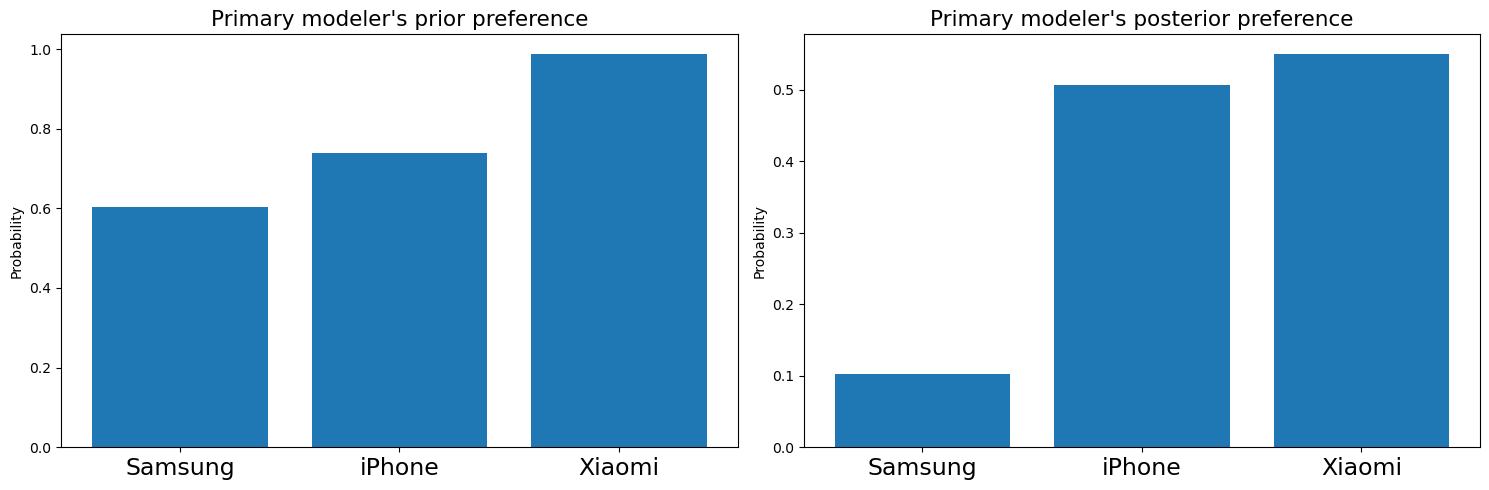

In [ ]:
# Simulated experts for SAMSUNG
samsung_experts = np.array([
    [4, 3, 4], [5, 3, 5], [5, 6, 5], [6, 5, 3], [6, 6, 6], 
    [5, 6, 5], [6, 6, 5], [6, 3, 4], [4, 5, 4], [6, 4, 3]
])

# Simulated experts for IPHONE
iphone_experts = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
])

# Simulated experts for XIAOMI
xiaomi_experts = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
])

# Placeholder data for primary modelers scores and other parameters
the_primary_modelers_scores = np.array([
    [3, 4, 1],
    [6, 5, 6],
    [4, 4, 3]
])

opinion_certainty = np.array([1, 0.4, 0.1])
apply_certainty = True
n_of_responders = np.array([10, 10, 10])
Trust_matrix = np.ones((3, 10))
score_preference = np.array([4, 4, 4])
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)
score_range_size = 6
low_weight_for_unselected_features = 0.01

# Calling the function with the provided data
The_primary_modelers_aposterior_old, The_primary_modelers_aposterior_updated = auxiliary.simulated_example(
    the_primary_modelers_scores, opinion_certainty, apply_certainty, n_of_responders, Trust_matrix,
    score_preference, P_I_B, score_range_size, low_weight_for_unselected_features,
    *samsung_experts, *iphone_experts, *xiaomi_experts
)

# Create a figure window
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# The primary modelers' old a posteriori distribution on brands:
axs[0].bar(['Samsung', 'iPhone', 'Xiaomi'], The_primary_modelers_aposterior_old)
axs[0].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)
axs[0].set_ylabel('Probability')
axs[0].set_title("Primary modeler's prior preference", fontsize=15.5)

# The primary modelers' updated a posteriori distribution on brands:
axs[1].bar(['Samsung', 'iPhone', 'Xiaomi'], The_primary_modelers_aposterior_updated)
axs[1].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)
axs[1].set_ylabel('Probability')
axs[1].set_title("Primary modeler's posterior preference", fontsize=15.5)

# Save the plot
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_5.png')
plt.tight_layout()
plt.savefig(save_path)

# Display the plot
plt.show()


The primary modeler's posterior distribution on brands before opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_old
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_old = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_old_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_old]

# Create a DataFrame
The_primary_modelers_aposterior_old_df = pd.DataFrame(
    [The_primary_modelers_aposterior_old_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Old:")
print(The_primary_modelers_aposterior_old_df)


The Primary Modeler's Aposterior Old:
  Samsung iPhone Xiaomi
0  42.48%   7.5%   5.1%


The primary modeler's posterior distribution on brands after opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_updated
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_updated = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_updated_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_updated]

# Create a DataFrame
The_primary_modelers_aposterior_updated_df = pd.DataFrame(
    [The_primary_modelers_aposterior_updated_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Updated:")
print(The_primary_modelers_aposterior_updated_df)


The Primary Modeler's Aposterior Updated:
  Samsung  iPhone  Xiaomi
0  10.65%  15.12%  88.46%


The opinion certainty process works as intended in this example.

### Example 2
In this example the maximum opinion certainty =1  in the primary modeler's low scores for the Samsung and iPhone brand should lead to the preference for the Xiaomi brand.

The primary modeler's opinion is configured to prefer the brands in the following order:
                     Xiaomi > Iphone >  Samsung. 

In [ ]:
# The primary modelers opinion
The_primary_modelers_scores = np.array([
    [3, 1, 1],
    [2, 3, 1],
    [6, 5, 5]
])

# Create a DataFrame
The_primary_modelers_scores_df = pd.DataFrame(
    The_primary_modelers_scores,
    index=["Samsung", "iPhone", "Xiaomi"],
    columns=["Feature 1", "Feature 2", "Feature 3"]
)

# Display the DataFrame
print("The Primary Modelers Scores Table:")
print(The_primary_modelers_scores_df)


The Primary Modelers Scores Table:
         Feature 1  Feature 2  Feature 3
Samsung          3          1          1
iPhone           2          3          1
Xiaomi           6          5          5


The primary modelers certainty in the opinion  for each brand is the following: 

In [ ]:
# Setting up the opinion certainty
opinion_certainty = np.array([0.2, 0.2, 1])

# Round the values and convert them to percentage strings
opinion_certainty_percent = [f"{round(value * 100, 1)}%" for value in opinion_certainty]

# Create a DataFrame
opinion_certainty_df = pd.DataFrame(
    [opinion_certainty_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("Opinion Certainty Table:")
print(opinion_certainty_df)


Opinion Certainty Table:
  Samsung iPhone  Xiaomi
0   20.0%  20.0%  100.0%


Similarly to the previous example, low values of opinion certainty  for Samsung and iPhone, result in higher influence of the experts' opinion on the opinion of the primary modeler. This can be intuitively interpreted as the primary modeler being more receptive to advice from the experts 

In [ ]:
# The primary modelers opinion
The_primary_modelers_scores = np.array([
    [3, 1, 1],
    [2, 3, 1],
    [6, 5, 5]
])

# Setting up the opinion certainty
opinion_certainty = np.array([0.2, 0.2, 1])

apply_certainty = True

# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded
n_of_responders = np.array([10, 10, 10])

# The trust is applied to the agents' opinion uniformly to all scores
# Trust_matrix = np.array([
#     [0.8, 0.9, 0.5, 0.9, 0.2, 0.2, 0.2, 0.5, 0.4, 0.9],
#     [0.3, 0.3, 0.9, 0.9, 0.5, 0.5, 0.2, 0.2, 0.8, 0.8],
#     [0.5, 0.7, 0.9, 0.2, 0.9, 0.8, 0.9, 0.7, 0.8, 0.9]
# ])

# Setting trust like this is equivalent to no inclusion of trust
Trust_matrix = np.ones((3, 10))

# Primary modelers score preference for each feature
score_preference = np.array([4, 4, 4])

# Primary modelers brand preference
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)

score_range_size = 6

# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value
low_weight_for_unselected_features = 0.01

# Displaying the data for verification
print("Primary Modelers Scores:\n", The_primary_modelers_scores)
print("Opinion Certainty:\n", opinion_certainty)
print("Apply Certainty:", apply_certainty)
print("Number of Responders:\n", n_of_responders)
print("Trust Matrix:\n", Trust_matrix)
print("Score Preference:\n", score_preference)
print("Brand Preference (Normalized):\n", P_I_B)
print("Score Range Size:\n", score_range_size)
print("Low Weight for Unselected Features:\n", low_weight_for_unselected_features)


Primary Modelers Scores:
 [[3 1 1]
 [2 3 1]
 [6 5 5]]
Opinion Certainty:
 [0.2 0.2 1. ]
Apply Certainty: True
Number of Responders:
 [10 10 10]
Trust Matrix:
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Score Preference:
 [4 4 4]
Brand Preference (Normalized):
 [0.33333333 0.33333333 0.33333333]
Score Range Size:
 6
Low Weight for Unselected Features:
 0.01


/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_16477/2212044613.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)
/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_16477/2212044613.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)


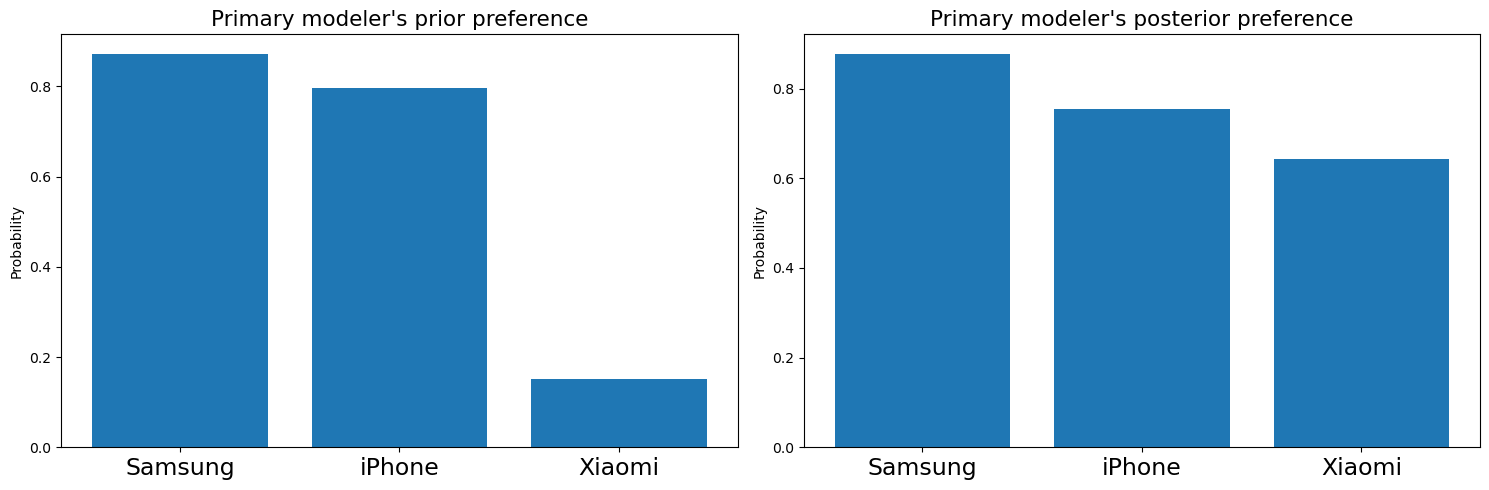

In [ ]:
# Simulated experts for SAMSUNG
samsung_experts = np.array([
    [4, 3, 4], [5, 3, 5], [5, 6, 5], [6, 5, 3], [6, 6, 6], 
    [5, 6, 5], [6, 6, 5], [6, 3, 4], [4, 5, 4], [6, 4, 3]
])

# Simulated experts for IPHONE
iphone_experts = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
])

# Simulated experts for XIAOMI
xiaomi_experts = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
])

# Placeholder data for primary modelers scores and other parameters
The_primary_modelers_scores = np.array([
    [3, 1, 1],
    [2, 3, 1],
    [6, 5, 5]
])

opinion_certainty = np.array([0.2, 0.2, 1])
apply_certainty = True
n_of_responders = np.array([10, 10, 10])
Trust_matrix = np.ones((3, 10))
score_preference = np.array([4, 4, 4])
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)
score_range_size = 6
low_weight_for_unselected_features = 0.01

# Call the simulated_example function with the provided data
The_primary_modelers_aposterior_old, The_primary_modelers_aposterior_updated = auxiliary.simulated_example(
    The_primary_modelers_scores, opinion_certainty, apply_certainty, n_of_responders, Trust_matrix,
    score_preference, P_I_B, score_range_size, low_weight_for_unselected_features,
    *samsung_experts, *iphone_experts, *xiaomi_experts
)

# Create a figure window
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# The primary modelers' old a posteriori distribution on brands
axs[0].bar(['Samsung', 'iPhone', 'Xiaomi'], The_primary_modelers_aposterior_old)
axs[0].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)
axs[0].set_ylabel('Probability')
axs[0].set_title("Primary modeler's prior preference", fontsize=15.5)

# The primary modelers' updated a posteriori distribution on brands
axs[1].bar(['Samsung', 'iPhone', 'Xiaomi'], The_primary_modelers_aposterior_updated)
axs[1].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)
axs[1].set_ylabel('Probability')
axs[1].set_title("Primary modeler's posterior preference", fontsize=15.5)

# Save the plot
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_6.png')
plt.tight_layout()
plt.savefig(save_path)

# Display the plot
plt.show()


The primary modeler's posterior distribution on brands before opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_old
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_old = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_old_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_old]

# Create a DataFrame
The_primary_modelers_aposterior_old_df = pd.DataFrame(
    [The_primary_modelers_aposterior_old_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Old:")
print(The_primary_modelers_aposterior_old_df)


The Primary Modeler's Aposterior Old:
  Samsung  iPhone  Xiaomi
0  25.25%  65.91%  93.05%


The primary modeler's posterior distribution on brands after opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_updated
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_updated = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_updated_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_updated]

# Create a DataFrame
The_primary_modelers_aposterior_updated_df = pd.DataFrame(
    [The_primary_modelers_aposterior_updated_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Updated:")
print(The_primary_modelers_aposterior_updated_df)


The Primary Modeler's Aposterior Updated:
  Samsung  iPhone  Xiaomi
0  62.16%  35.36%  32.09%


The opinion certainty process works as intended in this example.

### Example 3
In this example the maximum opinion certainty =1 in the primary modeler's lowest scores for Samsung brand should lead to the preference for the iPhone brand.

The primary modeler's opinion is configured to prefer the brands in the following order:
                      Iphone > Xiaomi > Samsung. 

In [ ]:
# The primary modelers opinion
The_primary_modelers_scores = np.array([
    [1, 1, 1],
    [6, 5, 6],
    [4, 4, 3]
])

# Create a DataFrame
The_primary_modelers_scores_df = pd.DataFrame(
    The_primary_modelers_scores,
    index=["Samsung", "iPhone", "Xiaomi"],
    columns=["Feature 1", "Feature 2", "Feature 3"]
)

# Display the DataFrame
print("The Primary Modelers Scores Table:")
print(The_primary_modelers_scores_df)


The Primary Modelers Scores Table:
         Feature 1  Feature 2  Feature 3
Samsung          1          1          1
iPhone           6          5          6
Xiaomi           4          4          3


Additionally, to simulate an issue with this design, all of the experts'  opinions for Samsung are deliberately set to the highest scores.

The primary modelers certainty in the opinion  for each brand is the following: 

In [ ]:
# Setting up the opinion certainty
opinion_certainty = np.array([1, 0, 0])

# Round the values and convert them to percentage strings
opinion_certainty_percent = [f"{round(value * 100, 1)}%" for value in opinion_certainty]

# Create a DataFrame
opinion_certainty_df = pd.DataFrame(
    [opinion_certainty_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("Opinion Certainty Table:")
print(opinion_certainty_df)


Opinion Certainty Table:
  Samsung iPhone Xiaomi
0    100%     0%     0%


In [ ]:
# The primary modelers opinion
The_primary_modelers_scores = np.array([
    [1, 1, 1],
    [6, 5, 6],
    [4, 4, 3]
])

# Setting up the opinion certainty
opinion_certainty = np.array([1, 0, 0])

apply_certainty = True

# Setting up the number of responders for each brand so that the opinion
# certainty can be applied as many times as the responders responded
n_of_responders = np.array([10, 10, 10])

# The trust is applied to the agents' opinion uniformly to all scores
# Trust_matrix = np.array([
#     [0.8, 0.9, 0.5, 0.9, 0.2, 0.2, 0.2, 0.5, 0.4, 0.9],
#     [0.3, 0.3, 0.9, 0.9, 0.5, 0.5, 0.2, 0.2, 0.8, 0.8],
#     [0.5, 0.7, 0.9, 0.2, 0.9, 0.8, 0.9, 0.7, 0.8, 0.9]
# ])

# Setting trust like this is equivalent to no inclusion of trust
Trust_matrix = np.ones((3, 10))

# Primary modelers score preference for each feature
score_preference = np.array([4, 4, 4])

# Primary modelers brand preference
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)

score_range_size = 6

# The values of exponents in Dirichlet distribution must be non-zero,
# setting them to a low value
low_weight_for_unselected_features = 0.01

# Displaying the data for verification
print("Primary Modelers Scores:\n", The_primary_modelers_scores)
print("Opinion Certainty:\n", opinion_certainty)
print("Apply Certainty:", apply_certainty)
print("Number of Responders:\n", n_of_responders)
print("Trust Matrix:\n", Trust_matrix)
print("Score Preference:\n", score_preference)
print("Brand Preference (Normalized):\n", P_I_B)
print("Score Range Size:\n", score_range_size)
print("Low Weight for Unselected Features:\n", low_weight_for_unselected_features)


Primary Modelers Scores:
 [[1 1 1]
 [6 5 6]
 [4 4 3]]
Opinion Certainty:
 [1 0 0]
Apply Certainty: True
Number of Responders:
 [10 10 10]
Trust Matrix:
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Score Preference:
 [4 4 4]
Brand Preference (Normalized):
 [0.33333333 0.33333333 0.33333333]
Score Range Size:
 6
Low Weight for Unselected Features:
 0.01


When opinion certainty values  for iPhone and Xiaomi are set to zero, it results in the complete influence of the experts' opinions on the primary modeler's own opinion. This can be intuitively interpreted as the primary modeler completely replacing his own opinion with the opinions of the experts .

/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_16477/1587207118.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)
/var/folders/wm/cf004srn2bx_p8lzdm9k_rr80000gn/T/ipykernel_16477/1587207118.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)


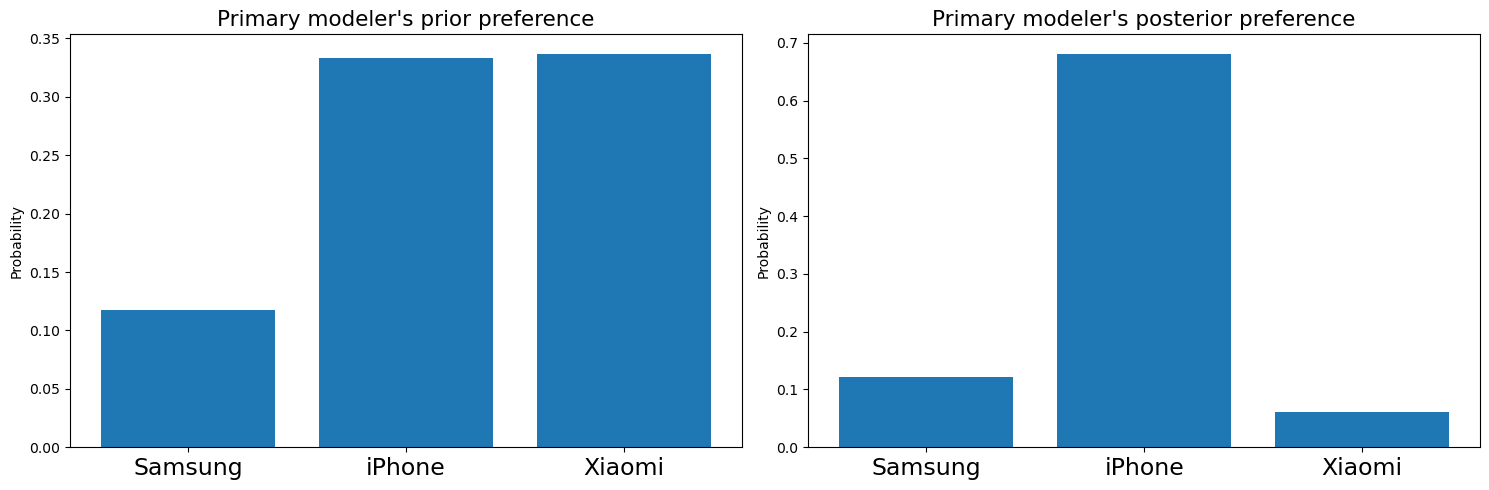

In [ ]:
# Simulated experts for SAMSUNG
samsung_experts = np.array([
    [6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6], 
    [6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6]
])

# Simulated experts for IPHONE
iphone_experts = np.array([
    [5, 5, 5], [5, 6, 5], [3, 4, 4], [3, 4, 5], [4, 5, 5], 
    [5, 6, 4], [6, 6, 6], [5, 6, 6], [4, 3, 4], [4, 6, 3]
])

# Simulated experts for XIAOMI
xiaomi_experts = np.array([
    [3, 4, 3], [3, 3, 4], [4, 3, 4], [3, 3, 3], [5, 4, 3], 
    [3, 5, 5], [4, 5, 6], [4, 3, 2], [3, 4, 3], [4, 3, 4]
])

# Placeholder data for primary modelers scores and other parameters
The_primary_modelers_scores = np.array([
    [1, 1, 1],
    [6, 5, 6],
    [4, 4, 3]
])

opinion_certainty = np.array([1, 0, 0])
apply_certainty = True
n_of_responders = np.array([10, 10, 10])
Trust_matrix = np.ones((3, 10))
score_preference = np.array([4, 4, 4])
P_I_B = np.array([2, 2, 2])
P_I_B = P_I_B / np.sum(P_I_B)
score_range_size = 6
low_weight_for_unselected_features = 0.01

# Call the simulated_example function with the provided data
The_primary_modelers_aposterior_old, The_primary_modelers_aposterior_updated = auxiliary.simulated_example(
    The_primary_modelers_scores, opinion_certainty, apply_certainty, n_of_responders, Trust_matrix,
    score_preference, P_I_B, score_range_size, low_weight_for_unselected_features,
    *samsung_experts, *iphone_experts, *xiaomi_experts
)

# Create a figure window
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# The primary modelers' old a posteriori distribution on brands
axs[0].bar(['Samsung', 'iPhone', 'Xiaomi'], The_primary_modelers_aposterior_old)
axs[0].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)
axs[0].set_ylabel('Probability')
axs[0].set_title("Primary modeler's prior preference", fontsize=15.5)

# The primary modelers' updated a posteriori distribution on brands
axs[1].bar(['Samsung', 'iPhone', 'Xiaomi'], The_primary_modelers_aposterior_updated)
axs[1].set_xticklabels(['Samsung', 'iPhone', 'Xiaomi'], fontsize=17)
axs[1].set_ylabel('Probability')
axs[1].set_title("Primary modeler's posterior preference", fontsize=15.5)

# Save the plot
save_path = os.path.join(working_directory, 'Bar_charts', 'figure_7.png')
plt.tight_layout()
plt.savefig(save_path)

# Display the plot
plt.show()


The primary modeler's posterior distribution on brands before opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_old
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_old = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_old_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_old]

# Create a DataFrame
The_primary_modelers_aposterior_old_df = pd.DataFrame(
    [The_primary_modelers_aposterior_old_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Old:")
print(The_primary_modelers_aposterior_old_df)


The Primary Modeler's Aposterior Old:
  Samsung  iPhone  Xiaomi
0  27.19%  53.48%  27.27%


The primary modeler's posterior distribution on brands after opinion merging.

In [ ]:
# Placeholder for The_primary_modelers_aposterior_updated
# Replace this with the actual output from your simulated_example function
# The_primary_modelers_aposterior_updated = np.random.rand(3)

# Round the values and convert them to percentage strings
The_primary_modelers_aposterior_updated_percent = [f"{round(value * 100, 2)}%" for value in The_primary_modelers_aposterior_updated]

# Create a DataFrame
The_primary_modelers_aposterior_updated_df = pd.DataFrame(
    [The_primary_modelers_aposterior_updated_percent],
    columns=["Samsung", "iPhone", "Xiaomi"]
)

# Display the DataFrame
print("The Primary Modeler's Aposterior Updated:")
print(The_primary_modelers_aposterior_updated_df)


The Primary Modeler's Aposterior Updated:
  Samsung  iPhone  Xiaomi
0   72.1%  49.82%  26.48%


In this scenario, an unexpected outcome occurs due to the way each expert's  contribution to the updated weight  and the primary modeler's contribution are configured. In particular:
Each expert's contribution to the updated weight  has a magnitude of +1.
The primary modeler's contribution to the updated weight  is also +1 for each expert, given that opinion certainty  is set to the maximum value of 1.
As a result, the updated weight becomes = 10 for all . This leads to high maximum values for the respective probabilities  for all , of choosing the underlying scores. Consequently, the probabilities entering the final posterior distribution on brands  remain high, resulting in the selection of the Samsung brand, contrary to the expected outcome.

(What will follow in DP is commentary on a future solution using prefference elicitation.)